# Convective Velocity Profiles 

Exploring convective velocity prediction from mixing length theory (MLT) as a function of different variables and at different evolutionary stages. The idea is to develop a phenomenological model for effects of dynamic pressure on stellar structure, particularly for RGB and AGB stars. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

If we define the dyanmic pressure as a turbulent pressure within the convection zone, then a first approximation is to use the mixing length theory velocity as a basis for the turbulent velocity. That is, we can define
\begin{equation}
    P_{\rm dyn} \approx P_{\rm turb} \approx C_{\rm turb}\rho u_{\rm mlt}^2,
\end{equation}
where $C_{\rm turb} = 1/3$ for isotropic turbulence. However, it's well known that mixing length theory is not valid in super-adiabatic regions. Mixing length theory is derived assuming adibatic convection. That is, assuming radiation does not carry a significnat fraction of energy away from convecting element and assuming that convective velocities are sub-sonic. 

Let's load an envelope structure for a solar-mass star at 5 Gyr.

In [2]:
env = np.genfromtxt('data/m1000_GS98_p000_p0_KS66_SolarCal.env')

A convective velocity profile for solar-mass star at 5 Gyr looks like this:

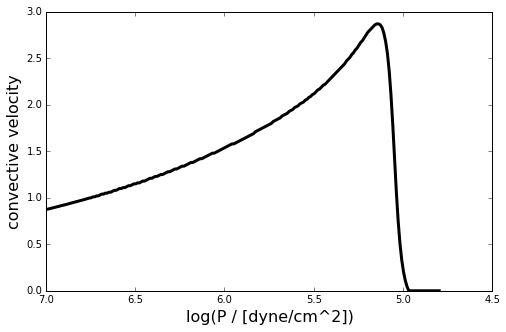

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(8., 5.))

ax.set_xlabel('log(P / [dyne/cm^2])', size=16.)
ax.set_ylabel('convective velocity', size=16.)
ax.set_xlim(7.0, 4.5)

ax.plot(env[:, 1], env[:, 14]/1.0e5, '-', lw=3, c='black')

This produces the following profile for the dynamical pressure contribution,

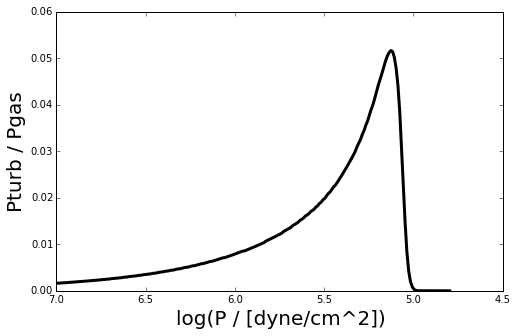

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8., 5.))

ax.set_xlabel('log(P / [dyne/cm^2])', size=20.)
ax.set_ylabel('Pturb / Pgas', size=20.)
ax.set_xlim(7.0, 4.5)

ax.plot(env[:, 1], (10**env[:, 5]*env[:, 14]**2/3.0)/10**env[:, 1], '-', lw=3, c='black')

A critical feature of dynamical pressure that has been ignored, is that dynamical pressure extends beyond the nominal convective boundary. Waves and shocks can propagate across the boundary affecting higher atmospheric layers. This aspect of dynamical pressure is one we aim to introduce.

To do this, we can introduce a phenomenological model in the stellar atmospheric layers and superficial layers in the envelope. This model can be superposed with the dynamic pressure profile predicted from mixing length theory. 

The phenomenological model can be controlled by a few parameters. First, the footpoint (in pressure or density space) that defines the zero-point in the envelope. Second, the gradient of the dynamic pressure as a function of pressure or density. Third, a peak value, likely related to the local sound speed. A fourth value may also be considered, which is a scaling factor to everywhere alter the dynamic pressure.

Above, we looked at dynamic pressure as a function of the gas pressure. But let's look instead as a function of the density. Since the dynamic pressure is a function of density already, this may be a suitable choice.

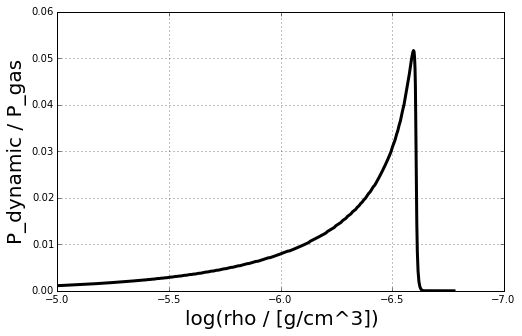

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8., 5.))

ax.set_xlabel('log(rho / [g/cm^3])', size=20.)
ax.set_ylabel('P_dynamic / P_gas', size=20.)
ax.set_xlim(-5.0, -7.0)

ax.grid()

ax.plot(env[:, 5], (10**env[:, 5]*env[:, 14]**2/3.0)/10**env[:, 1], '-', lw=3, c='black')
fig.savefig('Pdyn_rho.pdf')

Now, let's load the atmospheric profile for this model.

In [6]:
atm = np.genfromtxt('data/m1000_GS98_p000_p0_KS66_SolarCal.atm')

Define a function to compute the atmospheric dynamical pressure profile.

In [7]:
def dynamicPressure(logD, logP, gamma_one, foot_point = -6.0, scale = 1.0e-3):
    dynamic_pressure_ratio = scale*(foot_point - logD)**3
    dynamic_pressure_ratio = np.array([max(0.0, x) for x in dynamic_pressure_ratio])
    return np.array([min(dynamic_pressure_ratio[i], gamma_one[i]) for i in 
                     range(len(dynamic_pressure_ratio))])

In [8]:
all_logd   = np.append(atm[:, 3], env[:, 5])
all_logP   = np.append(atm[:, 1], env[:, 1])
all_gamma  = np.append(atm[:,10], env[:,15])
all_dyn_pr = dynamicPressure(all_logd, all_logP, all_gamma)

Here's what that linear function looks like:

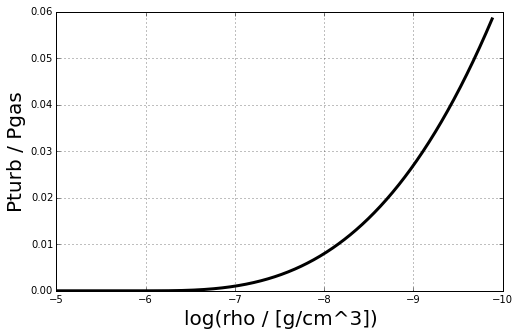

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8., 5.))

ax.set_xlabel('log(rho / [g/cm^3])', size=20.)
ax.set_ylabel('Pturb / Pgas', size=20.)
ax.set_xlim(-5.0, -10.0)

ax.grid()

ax.plot(all_logd, all_dyn_pr, '-', lw=3, c='black')

Now linearly combine it with the profile generate from MLT.

In [10]:
mlt_dyn_pr = np.append(np.zeros(len(atm)), (10**env[:, 5]*env[:, 14]**2/3.0)/10**env[:, 1])
tot_dyn_pr = all_dyn_pr + mlt_dyn_pr

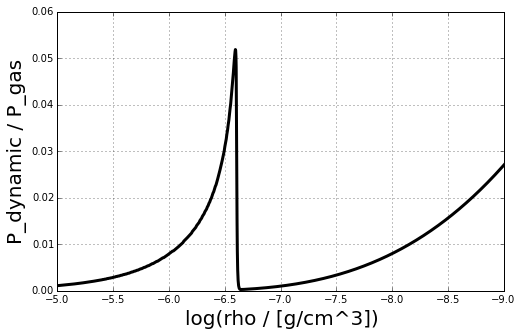

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8., 5.))

ax.set_xlabel('log(rho / [g/cm^3])', size=20.)
ax.set_ylabel('P_dynamic / P_gas', size=20.)
ax.set_xlim(-5.0, -9.0)

ax.grid()

ax.plot(all_logd, tot_dyn_pr, '-', lw=3, c='black')
fig.savefig('Pdyn_rho_ext.pdf')